In [18]:
import numpy as np
from numpy import cos,sin, pi,sqrt, tan, ndarray, array, zeros, abs
import matplotlib.pyplot as plt

Suppose the ego vehicle is currently at the origin, $(0.0, 0.0, 0.0)$, and one of the points in its footprint is at $(0.5, 0.5)$. One point along the ego vehicle's path is $(3.0, 2.0, \frac{\pi}4)$. After performing rotation and translation on this footprint point relative to this path point, what is the footprint point's corresponding position?

In [9]:
def rotate(angle:float, point:ndarray)->ndarray:
    rotation_matrix = array([[cos(angle),-sin(angle)],[sin(angle),cos(angle)]])
    return rotation_matrix@point

ego_position = zeros(3)
foot_print = array([0.5,0.5])
point_along_ego_path = array([3.0,2.0, pi/4])

rotate(point_along_ego_path[2],foot_print) + point_along_ego_path[0:2]

array([3.        , 2.70710678])

Text(3.0, 2.7071067811865475, 'R+T\nfoot print')

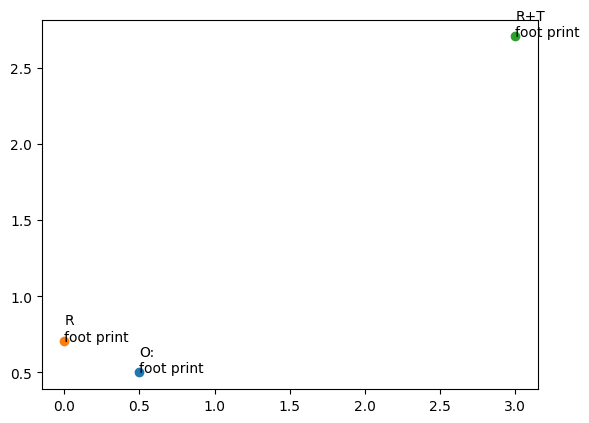

In [16]:
plt.scatter(*foot_print)
plt.text(*foot_print,"O:\nfoot print")
plt.scatter(*rotate(point_along_ego_path[2],foot_print))
plt.text(*rotate(point_along_ego_path[2],foot_print),"R\nfoot print")
plt.scatter(*(rotate(point_along_ego_path[2],foot_print) + point_along_ego_path[0:2]))
plt.text(*(rotate(point_along_ego_path[2],foot_print) + point_along_ego_path[0:2]),"R+T\nfoot print")

Suppose we have a bicycle model travelling at constant velocity $v = 1.0 \frac{m}s$, and length $L = 1.0 m$. If the time between planning cycles is $0.1 s$, the previous steering angle $\delta_1$ was $0.0 rad$, and the current steering angle is $0.5 rad$, what is the approximate angular acceleration?

In [19]:
def omega(v,l,delta):
    return v*tan(delta)/l
def alpha_mag(theta2, theta1, deltaT):
    return abs((theta2-theta1)/delta_T)
v = 1
l = 1
delta_T = 0.1
delta_1 = 0
delta_i = 0.5
teta_1 = omega(v,l,delta_T)
teta_2 = omega(v,l,delta_i)
print(alpha_mag(teta_2,teta_1,delta_T))

4.459678177583399


Suppose we have a bicycle model travelling at constant velocity $v = 1.0 \frac{m}s$, and length $L = 1.0 m$. If the time between planning cycles is $0.1 s$, and the previous steering angle $\delta_1$ was $0.0 rad$. If the maximum angular acceleration is $2.5 \frac{rad}{s^2}$, can a path with $\delta_2 = 0.2 rad$ be selected this iteration?

In [20]:
def valid_deltas(delta1,delta2,acc_max,l,delta_T,v):
    return abs(tan(delta2)-tan(delta1)) <= acc_max*l*delta_T/v
valid_deltas(0,0.2,2.5,1,0.1,1)

True

Suppose we have a bicycle model travelling at constant steering angle $\delta = 0.0 rad$, and length $L = 1.0 m$. If the time between planning cycles is $0.1 s$, the previous velocity was $20.0 \frac{m}s$, and the current velocity is $20.5 \frac{m}s$, what is the approximate linear acceleration?

In [21]:
acc = (20.5-20.0)/0.1
print(acc)

5.0
